In [295]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

### Batch Gradient Descent
    Update weights & bias after an epoch(iterating through complete training dataset once).
    Used for small training dataset

### Stochastic Gradient Descent
    Randomly pick one sample and adjust weights & bias repeat this for complete training dataset.
    Used for very big training dataset

### Mini batch Gradient Descent
    like stochastic gradient descent only difference is that instead of choosing one randomly picked traing sample we use a batch of randomly picked training samples.

In [296]:
df = pd.read_csv('./data/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [297]:
sx = MinMaxScaler()
X = sx.fit_transform(df.drop(['price'], axis='columns'))
X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [298]:
sy = MinMaxScaler()
y = sy.fit_transform(np.array(df['price']).reshape(-1,1))
y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [299]:
y.reshape(y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(y.shape[0],), test_size=0.2, random_state=10) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 2) (4, 2) (16,) (4,)


In [301]:
def batch_gradient_descent(X, y, epoch=500, learning_rate=0.01):
    total_samples, no_of_features = X.shape
        
    w = np.ones(no_of_features)
    b = 0
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):
        y_predicted = (w@X.T)+b
        
        dw = (-2/total_samples)*(X.T@(y-y_predicted))
        db = (-2/total_samples)*np.sum(y-y_predicted)
        
        w = w -  learning_rate * dw
        b = b - learning_rate * db
    
        cost = np.mean(np.square(y-y_predicted))
        
        if i%10 == 0:
            epoch_list.append(i)
            cost_list.append(cost)

    return w, b, cost, cost_list, epoch_list

In [302]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_train, y_train)
print(f"w: {w}, b:{b}, cost:{cost}")

w: [0.69682225 0.65369434], b:-0.22132440929601144, cost:0.007600348438319726


Text(0, 0.5, 'cost')

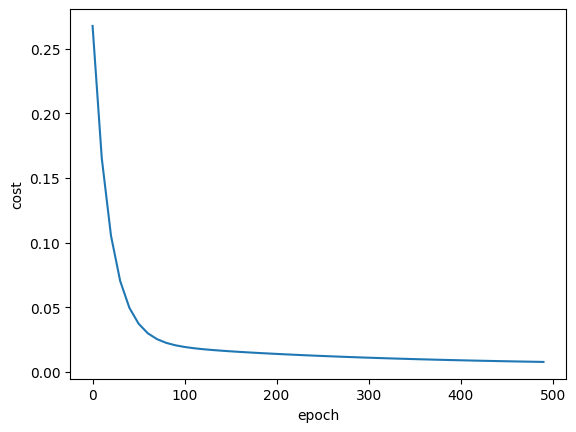

In [303]:
plt.plot(epoch_list, cost_list)
plt.xlabel('epoch')
plt.ylabel('cost')

In [304]:
def predict(X,w,b):
    X = sx.transform([X])[0]
    scaled_price = w@X.T + b
    return sy.inverse_transform([[scaled_price]])[0][0]

In [305]:
predict([1500,3],w,b)

c:\Users\Pratham\Desktop\ml\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


68.95236667633144

In [306]:
def stochastic_gradient_descent(X, y, epoch=10000, learning_rate=0.01):
    total_samples, no_of_features = X.shape
        
    w = np.ones(no_of_features)
    b = 0
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y[random_index]
        
        y_predicted = (w@sample_x.T)+b
        
        dw = (-2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        db = (-2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
        cost = np.square(sample_y-y_predicted)
        
        if i%100 == 0:
            epoch_list.append(i)
            cost_list.append(cost)

    return w, b, cost, cost_list, epoch_list

In [307]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_train, y_train)
print(f"w: {w_sgd}, b:{b_sgd}, cost:{cost_sgd}")

w: [0.68004544 0.63092744], b:-0.20324122931295432, cost:0.006157999419442633


Text(0, 0.5, 'cost')

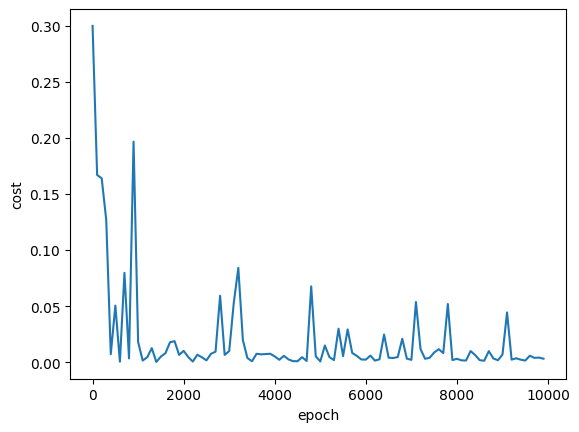

In [308]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.xlabel("epoch")
plt.ylabel("cost")

In [309]:
predict([1500,3],w_sgd,b_sgd)

c:\Users\Pratham\Desktop\ml\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.31013777911429